## Step 1: Import Libraries

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [5]:

import nltk
nltk.download("punkt")
nltk.download("stopwords")

nltk.data.path.append(r"C:\Users\hp\AppData\Roaming\nltk_data")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Step 2: Load Dataset (SMS Spam Collection from UCI repo)

In [6]:

url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/sms.tsv"
df = pd.read_csv(url, sep="\t", header=None, names=["label", "message"])

df.to_csv(r"C:\Users\hp\Codveda Projects\Task 8 Natural Language Processing - Text Classification\Data\SMS Spam Collection Dataset.csv")

print(df.head())

  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


## Step 3: Preprocessing Function

In [9]:
nltk.download("punkt", download_dir=r"C:\Users\hp\AppData\Roaming\nltk_data")
nltk.download("stopwords", download_dir=r"C:\Users\hp\AppData\Roaming\nltk_data")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
import nltk
nltk.download("punkt")
nltk.download("punkt_tab")   # <-- add this line
nltk.download("stopwords")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
import nltk
nltk.data.path.append(r"C:\Users\hp\AppData\Roaming\nltk_data")

def preprocess_text(text):
    tokens = word_tokenize(text.lower())  # lowercase + tokenize
    tokens = [t for t in tokens if t.isalpha()]  # keep only words
    tokens = [t for t in tokens if t not in stopwords.words("english")]  # remove stopwords
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(t) for t in tokens]  # stemming
    return " ".join(tokens)

df["clean_message"] = df["message"].apply(preprocess_text)

print("\nSample Cleaned Text:")
print(df[["message", "clean_message"]].head())

df[["clean_message"]].to_csv(
    r"C:\Users\hp\Codveda Projects\Task 8 Natural Language Processing - Text Classification\cleaned data\cleaned_messages.csv",
    index=False
)



Sample Cleaned Text:
                                             message  \
0  Go until jurong point, crazy.. Available only ...   
1                      Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup fina...   
3  U dun say so early hor... U c already then say...   
4  Nah I don't think he goes to usf, he lives aro...   

                                       clean_message  
0  go jurong point crazi avail bugi n great world...  
1                              ok lar joke wif u oni  
2  free entri wkli comp win fa cup final tkt may ...  
3                u dun say earli hor u c alreadi say  
4               nah think goe usf live around though  


## Step 4: Convert Text to Numerical Representation (TF-IDF)

In [14]:

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df["clean_message"])
y = df["label"]

## Step 5: Train-Test Split

In [15]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Step 6: Train Models

### Naive Bayes

In [16]:

nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

### Logistic Regression

In [18]:


log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

## Step 7: Evaluate Models

In [19]:

print("📊 Naive Bayes Classification Report")
print(classification_report(y_test, y_pred_nb))

print("📊 Logistic Regression Classification Report")
print(classification_report(y_test, y_pred_lr))

📊 Naive Bayes Classification Report
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       966
        spam       0.98      0.75      0.85       149

    accuracy                           0.97      1115
   macro avg       0.97      0.87      0.92      1115
weighted avg       0.97      0.97      0.96      1115

📊 Logistic Regression Classification Report
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       966
        spam       0.99      0.73      0.84       149

    accuracy                           0.96      1115
   macro avg       0.98      0.87      0.91      1115
weighted avg       0.96      0.96      0.96      1115



## Step 8: Confusion Matrices

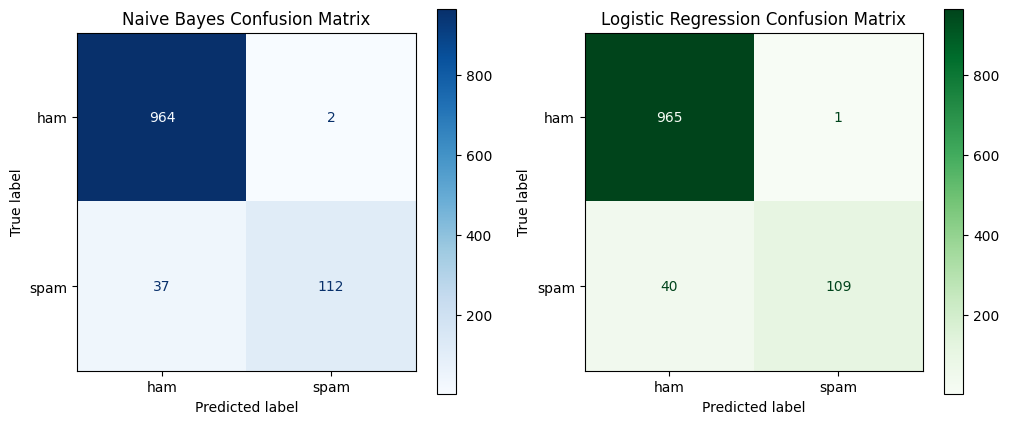

In [21]:

fig, axes = plt.subplots(1, 2, figsize=(12,5))

ConfusionMatrixDisplay.from_estimator(nb, X_test, y_test, ax=axes[0], cmap="Blues")
axes[0].set_title("Naive Bayes Confusion Matrix")

ConfusionMatrixDisplay.from_estimator(log_reg, X_test, y_test, ax=axes[1], cmap="Greens")
axes[1].set_title("Logistic Regression Confusion Matrix")

plt.savefig(r"C:\Users\hp\Codveda Projects\Task 8 Natural Language Processing - Text Classification\Visuals\Naive Bayes & Logistic Regression Confusion Matrix.png", dpi=300, bbox_inches='tight')
plt.show()

# Workflow Summary

- Dataset: SMS Spam Collection (spam vs ham).

- Preprocessing: tokenization → stopword removal → stemming → join back.

- Vectorization: TF-IDF.

Models:

- Naive Bayes

- Logistic Regression

Evaluation: Precision, Recall, F1-score + Confusion Matrices.